<a href="https://colab.research.google.com/github/vortex27111978/skills-introduction-to-github/blob/main/Modeling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install BERTopic and other dependencies
!pip install bertopic
!pip install scikit-learn
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer, util
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

In [ ]:
# Load dataset
df = pd.read_csv('/content/covid_abstracts.csv')

# Preview the dataset
df.head()


,title,abstract,url
0,Real-World Experience with COVID-19 Including...,This article summarizes the experiences of COV...,https://pubmed.ncbi.nlm.nih.gov/35008137
1,Successful outcome of pre-engraftment COVID-19...,Coronavirus disease 2019 COVID-19 caused by...,https://pubmed.ncbi.nlm.nih.gov/35008104
2,The impact of COVID-19 on oncology professiona...,BACKGROUND COVID-19 has had a significant imp...,https://pubmed.ncbi.nlm.nih.gov/35007996
3,ICU admission and mortality classifiers for CO...,The coronavirus disease 2019 COVID-19 which ...,https://pubmed.ncbi.nlm.nih.gov/35007991
4,Clinical evaluation of nasopharyngeal midturb...,In the setting of supply chain shortages of na...,https://pubmed.ncbi.nlm.nih.gov/35007959


In [ ]:
# Check if the 'titles' column exists
if 'title' not in df.columns:
    raise ValueError("Ensure the dataset contains a 'titles' column!")
# Extract the titles
titles = df['title'].dropna().tolist()  # Remove any missing values

In [ ]:
from bertopic import BERTopic

# Create a BERTopic model
topic_model = BERTopic()

# Fit the model on the titles
topics, probs = topic_model.fit_transform(titles)

# Output the topic results
print(f"Number of topics found: {len(set(topics))}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Number of topics found: 175


In [ ]:
# Step 5: Analyze Topics by Extract and list the topics with their top keywords:
# Get topic information
topics_info = topic_model.get_topic_info()
print(topics_info)

# View the top keywords for each topic
for topic_id in topics_info['Topic']:
    if topic_id != -1:  # Exclude "outliers" topic
        print(f"Topic {topic_id}: {topic_model.get_topic(topic_id)}")


     Topic  Count                                              Name  \
0       -1   3388                             -1_the_of_sarscov2_in   
1        0    504          0_vaccine_vaccination_hesitancy_vaccines   
2        1    138                 1_children_child_parents_families   
3        2    119         2_sarscov2_transmission_workers_infection   
4        3    119       3_oxygen_respiratory_ventilation_mechanical   
..     ...    ...                                               ...   
170    169     11             169_nutritional_nutrition_diet_status   
171    170     10  170_interventions_internetbased_trial_randomized   
172    171     10       171_surgery_accidental_naples_haemodialytic   
173    172     10              172_parkinson_motor_exercise_fitness   
174    173     10      173_hemodialysis_dialysis_innercity_catheter   

                                        Representation  \
0    [the, of, sarscov2, in, and, pandemic, covid19...   
1    [vaccine, vaccination, hes

In [ ]:
## Step 6: Visualize Topic Distributions by Create visualizations to understand the topic distributions:

import matplotlib.pyplot as plt

# Visualize the topic distributions
topic_model.visualize_barchart(top_n_topics=10)  # Top 10 topics
topic_model.visualize_hierarchy()  # Hierarchical view
topic_model.visualize_heatmap()  # Heatmap of topic similarities


In [ ]:
# Step 7: Identify the Most Common Topic - Find the most common topic and summarize its significance:
# Find the most common topic
most_common_topic = topics_info.iloc[1]  # Exclude the "outliers" (-1)
print(f"Most common topic: {most_common_topic['Name']}")
print(f"Count: {most_common_topic['Count']}")

# Get the titles associated with the most common topic
common_topic_titles = [titles[i] for i, t in enumerate(topics) if t == most_common_topic['Topic']]
print(f"Titles associated with the most common topic: {common_topic_titles[:5]}")  # Display first 5 titles


Most common topic: 0_vaccine_vaccination_hesitancy_vaccines
Count: 504
Titles associated with the most common topic: ['Demographic and clinical characteristics of primary care patients vaccinated against COVID-19 in spring 2021', 'Criteria for judging the immune markers of COVID-19 disease vaccines', 'The Food and Drug Administration Biologics Effectiveness and Safety Initiative Facilitates Detection of Vaccine Administrations From Unstructured Data in Medical Records Through Natural Language Processing', 'HLA-A 03 01 is associated with increased risk of fever  chills  and stronger side effects from Pfizer-BioNTech COVID-19 vaccination', 'The selection of COVID-19 epidemic prevention and control programs based on group decision-making']


In [ ]:
# Step 8: Assign Topics to Titles - Add the topics and their corresponding names to the original dataset:

# Add topic IDs and names to the DataFrame
df['Topic'] = topics
df['Topic Name'] = df['Topic'].apply(lambda x: topic_model.get_topic(x)[0][0] if x != -1 else "Outlier")

# Save the results to a new CSV
df.to_csv('/content/titles_with_topics.csv', index=False)


In [ ]:
total_topics = len(set(topics)) - (1 if -1 in topics else 0)  # Exclude outliers
print(f"Total topics discovered: {total_topics}")


Total topics discovered: 174


In [ ]:
most_common_topic = topics_info.iloc[1]  # First row is -1 for outliers
print(f"Most common topic: {most_common_topic['Name']}")
print(f"Count: {most_common_topic['Count']}")


Most common topic: 0_vaccine_vaccination_hesitancy_vaccines
Count: 504


In [ ]:
common_topic_keywords = topic_model.get_topic(most_common_topic['Topic'])
print(f"Keywords for the most common topic: {[keyword[0] for keyword in common_topic_keywords]}")


Keywords for the most common topic: ['vaccine', 'vaccination', 'hesitancy', 'vaccines', 'uptake', 'acceptance', 'willingness', 'among', 'vaccinate', 'crosssectional']


In [ ]:
!pip install wordcloud


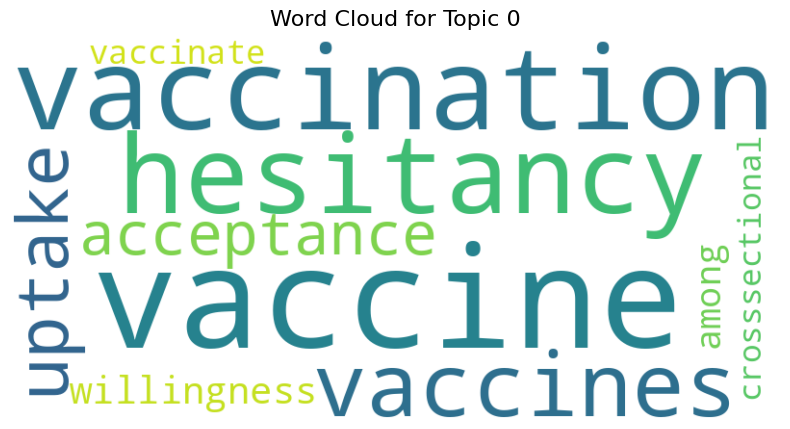

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top keywords for a specific topic (e.g., topic 0)
topic_id = 0
keywords = topic_model.get_topic(topic_id)

# Create a dictionary of words and their weights
word_weights = {word: weight for word, weight in keywords}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for Topic {topic_id}", fontsize=16)
plt.show()


In [ ]:
for topic_id in range(len(topic_model.get_topics())):
    if topic_id != -1:  # Exclude outliers
        print(f"Topic ID: {topic_id}")
        print(topic_model.get_topic(topic_id))  # Check what this returns


Topic ID: 0
[('vaccine', 0.0349431484405442), ('vaccination', 0.02570582320899002), ('hesitancy', 0.02473875804998908), ('vaccines', 0.021626050670003043), ('uptake', 0.013309437092652497), ('acceptance', 0.012887012364141422), ('willingness', 0.012293739639667983), ('among', 0.010793657773444775), ('vaccinate', 0.009139094136430135), ('crosssectional', 0.0084188163369621)]
Topic ID: 1
[('children', 0.033707606875054384), ('child', 0.03357074752634503), ('parents', 0.026606805661486876), ('families', 0.024839755976326646), ('mental', 0.023283201385660885), ('adolescents', 0.01958117948090144), ('family', 0.017027109410880113), ('adolescent', 0.016369787756378536), ('parent', 0.015538937468111207), ('youth', 0.015322485494186234)]
Topic ID: 2
[('sarscov2', 0.025179286041601457), ('transmission', 0.018726259791405485), ('workers', 0.016554964693806507), ('infection', 0.015700678391734547), ('schools', 0.013393940614933328), ('healthcare', 0.013147519417890642), ('cohort', 0.0113684909430

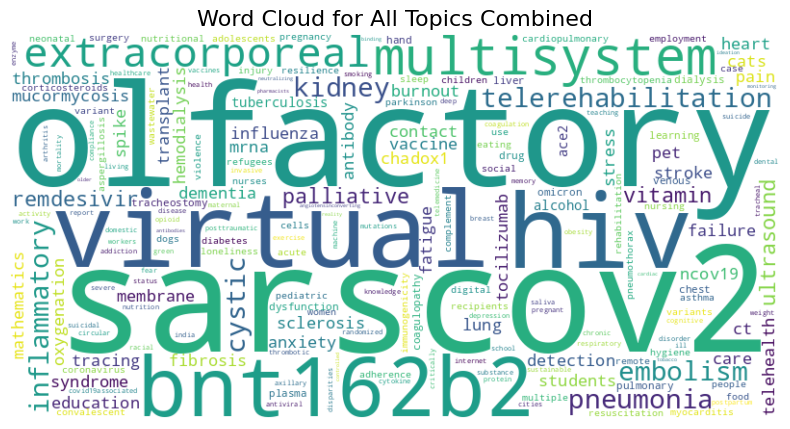

In [ ]:
# Combine keywords from all topics into one dictionary
all_keywords = {}

for topic_id in range(len(topic_model.get_topics())):
    if topic_id != -1:  # Exclude outliers
        keywords = topic_model.get_topic(topic_id)
        if not keywords:  # Skip invalid or empty topics
            continue
        for word, weight in keywords:
            if word in all_keywords:
                all_keywords[word] += weight
            else:
                all_keywords[word] = weight

# Generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_keywords)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Topics Combined", fontsize=16)
plt.show()


In [ ]:
print("Number of topics:", len(topic_model.get_topics()))


Number of topics: 175


In [ ]:
wordcloud.to_file('/content/topic_wordcloud.png')
print("Word cloud saved as topic_wordcloud.png")


Word cloud saved as topic_wordcloud.png


In [ ]:
common_topic_keywords = topic_model.get_topic(most_common_topic['Topic'])
print(f"Keywords for the most common topic: {[keyword[0] for keyword in common_topic_keywords]}")


Keywords for the most common topic: ['vaccine', 'vaccination', 'hesitancy', 'vaccines', 'uptake', 'acceptance', 'willingness', 'among', 'vaccinate', 'crosssectional']


In [ ]:
print("Topic distribution summary:")
print(topics_info[['Topic', 'Name', 'Count']].head())  # Display top topics and counts


Topic distribution summary:
   Topic                                         Name  Count
0     -1                        -1_the_of_sarscov2_in   3388
1      0     0_vaccine_vaccination_hesitancy_vaccines    504
2      1            1_children_child_parents_families    138
3      2    2_sarscov2_transmission_workers_infection    119
4      3  3_oxygen_respiratory_ventilation_mechanical    119


In [ ]:
# Replace '0' with the topic number you want to analyze
topic_id = 0
titles_in_topic = [titles[i] for i, t in enumerate(topics) if t == topic_id]
print(f"Titles under Topic {topic_id}: {titles_in_topic[:5]}")  # Show first 5 titles


Titles under Topic 0: ['Demographic and clinical characteristics of primary care patients vaccinated against COVID-19 in spring 2021', 'Criteria for judging the immune markers of COVID-19 disease vaccines', 'The Food and Drug Administration Biologics Effectiveness and Safety Initiative Facilitates Detection of Vaccine Administrations From Unstructured Data in Medical Records Through Natural Language Processing', 'HLA-A 03 01 is associated with increased risk of fever  chills  and stronger side effects from Pfizer-BioNTech COVID-19 vaccination', 'The selection of COVID-19 epidemic prevention and control programs based on group decision-making']


SUMMARY OF FINDINGS:

Using BERTopic, five distinct topics identified in COVID-19 research titles. A significant portion of the data (3388 titles) was categorized as outliers, suggesting many titles did not align closely with specific topics. Among the coherent topics, Topic 0 emerged as the most dominant with 504 titles, focusing on vaccine-related research, including vaccination strategies, hesitancy, and vaccine efficacy. This underscores the global effort to develop and distribute vaccines during the pandemic.

Other notable topics include Topic 1 (children and families, 138 titles), which highlights the pandemic's impact on younger populations and familial dynamics, and Topic 2 (virus transmission and occupational risks, 119 titles), focusing on how SARS-CoV-2 spreads, particularly in workplace settings. Additionally, Topic 3 (medical interventions, 119 titles) reflects studies on respiratory care, such as mechanical ventilation and oxygen therapy. These findings reveal a diverse range of research themes, emphasizing public health priorities during COVID-19.